In [2]:
#Python Library for Dataframe usage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Serializing to a file
import _pickle as pickle

#Libraries for Graph
import networkx as nx
#etc. 
from collections import Counter

In [3]:
#Opening the pickled file
#Needs to be opened in the recommender folder
pickle_in = open("../data/graph/ingredient_full_graph.pickle","rb")

#Getting the dictionary from the pickle
pickled_G = pickle.load(pickle_in)

#Converting a dictionary of dictionaries to a graph
G = pickled_G

#For if you want to use the small subset in stead
pickle_in = open("./data/graph/molecule_subset_graph.pickle","rb")

#Getting the dictionary from the pickle
pickled_G = pickle.load(pickle_in)

#Converting a dictionary of dictionaries to a graph
G = pickled_G

In [4]:
print("Number of edges: ", G.number_of_edges())

Number of edges:  31956


In [5]:
print("Number of nodes: ", G.number_of_nodes())

Number of nodes:  267


In [5]:
#returns a dictionary based on attributes
ingredient_node_attribute = nx.get_node_attributes(G, 'ingredient_node')
molecule_node_attribute = nx.get_node_attributes(G, 'molecule_node')

In [6]:
#list of ingredients
ingredient_list = []
for node, boolean in ingredient_node_attribute.items():    
    if boolean == True:
        ingredient_list.append(node)

#list of non ingredients
molecule_list = []
for node, boolean in molecule_node_attribute.items():   
    if boolean == True:
        molecule_list.append(node)

In [7]:
print("number of ingredients: ", len(ingredient_list))

number of ingredients:  267


In [8]:
print("number of molecules: ", len(molecule_list))

number of molecules:  1467


In [9]:
degree_dict = dict(G.degree())
degree_series = pd.Series(degree_dict)
degree_series.describe()

count    1734.000000
mean       30.355248
std        52.620840
min         1.000000
25%         2.000000
50%         5.000000
75%        26.000000
max       391.000000
dtype: float64

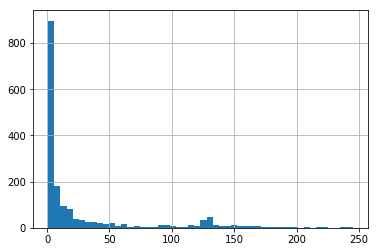

In [10]:
degree_series[degree_series < 250].hist(bins=50)

In [11]:
ingredient_centrality = []
for tup in Counter(nx.degree_centrality(G)).most_common():
    if tup[0] in ingredient_list:
        ingredient_centrality.append(tup)
print("Ingredients with highest centrality: ")
print(ingredient_centrality)

Ingredients with highest centrality: 
[('Tea', 0.22562031159838428), ('Apple', 0.17311021350259664), ('Cocoa', 0.16964800923254472), ('Coffee', 0.1552221581073283), ('Beer', 0.1517599538372764), ('Strawberry', 0.14829774956722447), ('Potato', 0.1465666474321985), ('Ginger', 0.14425851125216388), ('Orange', 0.1413733410271206), ('Papaya', 0.13906520484708598), ('Mango', 0.13733410271206), ('Spearmint', 0.1361800346220427), ('Mushroom', 0.1309867282169648), ('White Wine', 0.12983266012694747), ('Pepper', 0.12810155799192152), ('Pineapple', 0.12694748990190421), ('Celery', 0.12521638776687824), ('Peanut', 0.12233121754183496), ('Basil', 0.120600115406809), ('Apricot', 0.11944604731679168), ('Melon', 0.11944604731679168), ('Banana', 0.11886901327178302), ('Rosemary', 0.11886901327178302), ('Corn', 0.1154068090017311), ('Dill', 0.1154068090017311), ('Rice', 0.11482977495672243), ('Peach', 0.11482977495672243), ('Coriander', 0.11309867282169647), ('Rum', 0.11252163877668782), ('Lemon', 0.111

In [12]:
molecule_centrality = []
for tup in Counter(nx.degree_centrality(G)).most_common():
    if tup[0] in molecule_list:
        molecule_centrality.append(tup)
print("Molecules with highest centrality: ")
print(molecule_centrality)


Molecules with highest centrality: 
[('CID 644104', 0.11713791113675706), ('Heptanoic Acid', 0.10790536641661858), ('thiamine', 0.10732833237160992), ('Isobutyraldehyde', 0.10213502596653203), ('2-Phenylethanol', 0.10155799192152336), ('3-Methyl-1-butanol', 0.09809578765147144), ('3-Methylbutanal', 0.09578765147143681), ('Phenethyl acetate', 0.09521061742642815), ('phenylacetaldehyde', 0.0946335833814195), ('Octanal', 0.09290248124639353), ('4-hydroxybenzaldehyde', 0.09290248124639353), ('2,3-butanedione', 0.09290248124639353), ('Propionaldehyde', 0.09174841315637622), ('betaine', 0.09117137911136756), ('indole', 0.09117137911136756), ('3-methylthiopropanol', 0.09001731102135026), ('methanethiol', 0.0894402769763416), ('Hexanal', 0.0894402769763416), ('2-Methylbutyraldehyde', 0.08886324293133294), ('salicylic acid', 0.08770917484131563), ('3-(Methylthio)propionaldehyde', 0.08655510675129832), ('vanillin', 0.08655510675129832), ('cis-3-Hexenyl acetate', 0.08482400461627236), ('2-Butanon

In [13]:
print("Connected components: ", nx.number_connected_components(G))

Connected components:  1


In [14]:
for comp in nx.connected_components(G):
    print(comp)

{'Elemol', 'Linalyl Acetate', 'Margarine', 'Tetradecanoic acid', 'nicotine', 'trans,trans-2,4-Nonadienal', 'Potassium Nitrate', 'Propyl butyrate', '1-Phenylethyl acetate', '103-95-7', '2-Hexanone', 'Linalyl octanoate', '2-Acetyl-2-thiazoline', 'ethyl acetoacetate', 'luteolin', 'Methyl oct-2-enoate', 'formic acid', 'Bornyl Acetate', '1-Phenylethanol', 'Phenethyl acetate', 'Decane', 'Papaya', '6-Methylquinoline', '2-Pentenal, (Z)-', 'Carvacryl methyl ether', 'cis-6-Nonen-1-ol', '3,5-Dimethyl-2-isobutylpyrazine', '3-Methylbenzaldehyde', 'Myrtenal', 'Sedanolide', 'Amaranth', 'cis-2-Penten-1-ol', 'Hexane', 'CHEBI:49249', '2-Methoxystyrene', '53398-85-9', 'indole-3-acetic acid', 'Winter squash', '(-)-beta-Pinene', '2-Isopropyl-4-methylthiazole', '2-Methylpentanoic acid', 'Hydroxycitronellal', 'Ethyl 3-(methylthio)propionate', '3,4-Dihydroxybenzoic Acid', 'Prickly Pear', 'Jicama', 'alpha-TERPINEOL', 'gamma-Butyrolactone', 'trans-2-Hexen-1-Ol', '2-Methyl-1,3-dithiolane', 'Oyster mushroom', 'Fe

Out of the three connected components, two are:
- {'Oxacycloheptadec-7-en-2-one', 'Muskmallow'}
- {'Cinnamyl cinnamate', 'Storax'}

The rest are all connected together

In [15]:
nx.degree_centrality(G)

{'Egg': 0.031736872475476054,
 '4-Methyl-2-pentanone': 0.020196191575302943,
 'thiamine': 0.10732833237160992,
 'L-phenylalanine': 0.015002885170225043,
 'L-histidine': 0.015002885170225043,
 '3-Methylindole': 0.0075014425851125215,
 'isopropanol': 0.030005770340450086,
 'Octan-2-one': 0.035776110790536636,
 '3-Hexanone': 0.0790536641661858,
 'betaine': 0.09117137911136756,
 '3-Methylbutanal': 0.09578765147143681,
 'lactic acid': 0.025966532025389497,
 'methanethiol': 0.0894402769763416,
 '5-Methylfurfural': 0.022504327755337564,
 'm-cresol': 0.0057703404500865545,
 'Pyrazine': 0.016733987305251007,
 'Methyl butyrate': 0.017311021350259664,
 '3-(Methylthio)propionaldehyde': 0.08655510675129832,
 'P-Cresol': 0.010386612810155798,
 'Tiglic aldehyde': 0.015579919215233698,
 '2-Pentylfuran': 0.024812463935372186,
 '50-69-1': 0.004039238315060588,
 'Dl-Phenylalanine': 0.021350259665320254,
 'hydrogen sulfide': 0.013271783035199075,
 'CID 644104': 0.11713791113675706,
 '1-Penten-3-Ol': 0.023

In [16]:
nx.betweenness_centrality(G)

{'Egg': 0.0007193353568657327,
 '4-Methyl-2-pentanone': 0.000899505938381649,
 'thiamine': 0.021263553689810304,
 'L-phenylalanine': 0.0006636661755439123,
 'L-histidine': 0.0006758548802215917,
 '3-Methylindole': 0.00020801170194323674,
 'isopropanol': 0.001040501105168542,
 'Octan-2-one': 0.001459981654054855,
 '3-Hexanone': 0.005985159183409465,
 'betaine': 0.009962186700956345,
 '3-Methylbutanal': 0.009134743505314461,
 'lactic acid': 0.0008609286550143853,
 'methanethiol': 0.007717309744744431,
 '5-Methylfurfural': 0.001073930725195169,
 'm-cresol': 0.000103152864532732,
 'Pyrazine': 0.00037225083915968886,
 'Methyl butyrate': 0.000767937543794481,
 '3-(Methylthio)propionaldehyde': 0.006763436363518206,
 'P-Cresol': 0.0003590761866309749,
 'Tiglic aldehyde': 0.0005084678220899044,
 '2-Pentylfuran': 0.0013283617719688054,
 '50-69-1': 4.8344897830492295e-05,
 'Dl-Phenylalanine': 0.0013809734133876704,
 'hydrogen sulfide': 0.00046520987627209586,
 'CID 644104': 0.02630472119300405,
 

In [ ]:
# eigenvector centrality returns Power Iteration Failed Convergance Error
# nx.eigenvector_centrality(G)

communities = find_communities_n(G, 1)
print(len(communities))
print(communities)

best_communities_set = find_communities_modularity(G)
print(len(best_communities_set))
print(best_communities_set)